In [5]:
import pandas as pd, numpy as np

from sklearn.preprocessing import StandardScaler

review_stats = pd.read_csv('../data/combined_review_metrics.csv')

reviews = pd.read_csv('../data/all_reviews_without_unicode.csv')

C:\Users\pconn\AppData\Local\Temp\ipykernel_20376\505775941.py:7: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews = pd.read_csv('../data/all_reviews_without_unicode.csv')


In [109]:
review_stats.head()

,Unnamed: 0,index,count,mean,std,min,25%,50%,75%,max,IQR,UpperLimit,LowerLimit,type
0,0,productID,46079.0,5.467697,5.151862,1.0,1.000000,4.000000,9.000000,24.0,8.000000,21.000000,-11.000000,global
1,1,review_star_rating,46079.0,4.401550,1.116399,1.0,4.000000,5.000000,5.000000,5.0,1.000000,6.500000,2.500000,global
2,2,review_helpful_votes,46079.0,0.515940,6.137005,0.0,0.000000,0.000000,0.000000,637.0,0.000000,0.000000,0.000000,global
3,3,review_subjectivity,46079.0,0.582370,0.194915,0.0,0.479167,0.598148,0.708333,1.0,0.229167,1.052083,0.135417,global
4,4,review_polarity,46079.0,0.354453,0.285545,-1.0,0.172222,0.366667,0.544444,1.0,0.372222,1.102778,-0.386111,global


In [110]:
review_stats[['outlier_type','outlier_site','outlier_lang']] = review_stats['type'].str.split('_',n=2,expand=True)
#review_stats['outlier_site'] = review_stats['outlier_site'].str.split('_')
review_stats.head()
review_stats['outlier_site'].unique()
reviews['site'] = reviews['site'].str.lower()

In [111]:
review_stats.columns

Index(['Unnamed: 0', 'index', 'count', 'mean', 'std', 'min', '25%', '50%',
       '75%', 'max', 'IQR', 'UpperLimit', 'LowerLimit', 'type', 'outlier_type',
       'outlier_site', 'outlier_lang'],
      dtype='object')

In [112]:
review_stats.columns = ['ind','var','count', 'mean', 'std', 'min', '25%', '50%',
       '75%', 'max', 'IQR', 'UpperLimit', 'LowerLimit', 'type', 'outlier_type',
       'site', 'outlier_lang']

review_stats = review_stats.loc[(~review_stats.ind.isin([0,6,7,8,9])) & ~(review_stats['outlier_type']=='global')&(review_stats['outlier_lang']=='english')]
review_stats

,ind,var,count,mean,std,min,25%,50%,75%,max,IQR,UpperLimit,LowerLimit,type,outlier_type,site,outlier_lang
51,1,review_star_rating,5075.0,3.309360,1.577352,1.0,2.000000,4.000000,5.000000,5.0,3.000000,9.500000,-2.500000,site_amazon_english,site,amazon,english
52,2,review_helpful_votes,5075.0,3.126305,17.144037,0.0,0.000000,0.000000,2.000000,637.0,2.000000,5.000000,-3.000000,site_amazon_english,site,amazon,english
53,3,review_subjectivity,5075.0,0.533092,0.189711,0.0,0.432677,0.535726,0.643750,1.0,0.211073,0.960360,0.116067,site_amazon_english,site,amazon,english
54,4,review_polarity,5075.0,0.172267,0.277484,-1.0,0.000000,0.155966,0.341833,1.0,0.341833,0.854583,-0.512750,site_amazon_english,site,amazon,english
55,5,review_length,5075.0,65.986601,79.262176,1.0,19.000000,40.000000,84.000000,1164.0,65.000000,181.500000,-78.500000,site_amazon_english,site,amazon,english
61,1,review_star_rating,26057.0,4.577235,0.922646,1.0,5.000000,5.000000,5.000000,5.0,0.000000,5.000000,5.000000,site_bestbuy_english,site,bestbuy,english
62,2,review_helpful_votes,26057.0,0.152090,2.462711,0.0,0.000000,0.000000,0.000000,213.0,0.000000,0.000000,0.000000,site_bestbuy_english,site,bestbuy,english
63,3,review_subjectivity,26057.0,0.591088,0.190196,0.0,0.495833,0.600000,0.716667,1.0,0.220833,1.047917,0.164583,site_bestbuy_english,site,bestbuy,english
64,4,review_polarity,26057.0,0.397929,0.276500,-1.0,0.228125,0.411905,0.583333,1.0,0.355208,1.116146,-0.304688,site_bestbuy_english,site,bestbuy,english
65,5,review_length,26057.0,25.629850,33.013366,1.0,12.000000,17.000000,28.000000,1016.0,16.000000,52.000000,-12.000000,site_bestbuy_english,site,bestbuy,english


In [113]:
#outlier star rating
#outlier

def is_outlier(row,t):
    lookup = review_stats[(review_stats['var']==t) & (row['site']==review_stats['site'])]
    return np.any(
        np.array(
            [   
                row[t] > lookup['UpperLimit'],
                row[t] < lookup['LowerLimit']
            ]
        )
    )

def get_limits(row,t):
    lookup = review_stats[(review_stats['var']==t) & (row['site']==review_stats['site'])].iloc[0].copy()
    return lookup[['mean','std']]
    #return lookup[['UpperLimit','LowerLimit','25%','75%','IQR']]


for var in review_stats['var'].unique():
    reviews[[var+'_mean',var+'_std']] = reviews.apply(lambda row: get_limits(row,var),axis=1)
    #colname = var+'_outlier'
    reviews[var+'_outlier'] = reviews.apply(lambda row: is_outlier(row,var),axis=1)




KeyboardInterrupt: 

In [ ]:
reviews

,productID,prodSiteID,review_header,reviewer_name,review_content,review_star_rating,review_helpful_votes,verified_purchase,review_subjectivity,review_polarity,...,review_helpful_votes_outlier,review_subjectivity_mean,review_subjectivity_std,review_subjectivity_outlier,review_polarity_mean,review_polarity_std,review_polarity_outlier,review_length_mean,review_length_std,review_length_outlier
0,1,Amazon1,It is renewed but looked like new,Andre,"It was packaged very well, Amazon packaging, n...",5,1,True,0.588232,0.258266,...,False,0.533092,0.189711,False,0.172267,0.277484,False,65.986601,79.262176,False
1,1,Amazon1,Worth it,Alice,"The phone came in perfect conditions, without ...",5,2,True,0.430909,0.447273,...,False,0.533092,0.189711,False,0.172267,0.277484,False,65.986601,79.262176,False
2,1,Amazon1,Amazon Warehouse for the Win!,Mrs. K,I got a great deal on this at Amazon Warehouse...,5,2,True,0.554959,0.394215,...,False,0.533092,0.189711,False,0.172267,0.277484,False,65.986601,79.262176,False
3,1,Amazon1,Awesome,David Chaves Rojas,"Got my phone, 10/10. No scratches, still have ...",5,0,True,1.000000,1.000000,...,False,0.533092,0.189711,True,0.172267,0.277484,True,65.986601,79.262176,False
4,1,Amazon1,Like new iPhone 14,Rick,The iPhone 14 came with a battery that had 100...,5,0,True,0.636364,0.424242,...,False,0.533092,0.189711,False,0.172267,0.277484,False,65.986601,79.262176,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48076,41,BB41,Returned this product,TraceyPortchester,did not have the capacity to safeguard all of ...,1,0,True,0.000000,0.000000,...,False,0.591088,0.190196,True,0.397929,0.276500,False,25.629850,33.013366,False
48077,41,BB41,forget BB,Deede,Received in email but not downloadable. Geek ...,1,0,True,0.000000,0.000000,...,False,0.591088,0.190196,True,0.397929,0.276500,False,25.629850,33.013366,False
48078,41,BB41,Decent product,RamonI,Its a good antivirus program it does keep my c...,4,0,True,0.608333,0.088333,...,False,0.591088,0.190196,False,0.397929,0.276500,False,25.629850,33.013366,False
48079,41,BB41,Works great,GracieW,"Works great, never had a problem with it, will...",5,0,True,0.750000,0.800000,...,False,0.591088,0.190196,False,0.397929,0.276500,False,25.629850,33.013366,False


In [ ]:
reviews.to_csv('../data/reviews_with_stats.csv')

In [ ]:
reviews.columns

Index(['productID', 'prodSiteID', 'review_header', 'reviewer_name',
       'review_content', 'review_star_rating', 'review_helpful_votes',
       'verified_purchase', 'review_subjectivity', 'review_polarity',
       'review_length', 'url', 'review_lang', 'site', 'site_outlier',
       'site_outlier_en', 'global_outlier', 'global_outlier_en',
       'review_star_rating_mean', 'review_star_rating_std',
       'review_star_rating_outlier', 'review_helpful_votes_mean',
       'review_helpful_votes_std', 'review_helpful_votes_outlier',
       'review_subjectivity_mean', 'review_subjectivity_std',
       'review_subjectivity_outlier', 'review_polarity_mean',
       'review_polarity_std', 'review_polarity_outlier', 'review_length_mean',
       'review_length_std', 'review_length_outlier'],
      dtype='object')

In [ ]:
reviews = pd.read_csv('../data/reviews_with_stats.csv')

In [ ]:
def calc_outlier(row,var):
    #print(row[var])
    # print(row[var+'_sd'],row[var+'_mean'])
    #return 1
    sd = row[var+'_std']
    mu = row[var+'_mean']
    d = row[var]
    #print(row)
    return np.select(
        [d > 3*sd + mu, d < mu - 3*sd],[min(mu+3*sd,max(reviews[var])),max(mu-3*sd,min(reviews[var]))],default=d
    )
    # return np.select(
    #         [row[var] > (row[var+'_mean'] + 3*row[var+'_std']), (row[var] < row[var+'_mean'] - 3*row[var+'_std'])],
    #         [row[var+'_mean'] + 3*row[var+'_std'], max(row[var+'_mean'] - 3*row[var+'_std'], min(review_stats[var]))],
    #         default=row[var]
    # )    

for var in review_stats['var'].unique():
    print(var in reviews.columns)
    reviews[var+'_adjusted'] = reviews.apply(
        lambda row:calc_outlier(row,var),axis=1
    )

True
True
True
True
True


In [ ]:
reviews.columns

Index(['productID', 'prodSiteID', 'review_header', 'reviewer_name',
       'review_content', 'review_star_rating', 'review_helpful_votes',
       'verified_purchase', 'review_subjectivity', 'review_polarity',
       'review_length', 'url', 'review_lang', 'site', 'site_outlier',
       'site_outlier_en', 'global_outlier', 'global_outlier_en',
       'review_star_rating_mean', 'review_star_rating_std',
       'review_star_rating_outlier', 'review_helpful_votes_mean',
       'review_helpful_votes_std', 'review_helpful_votes_outlier',
       'review_subjectivity_mean', 'review_subjectivity_std',
       'review_subjectivity_outlier', 'review_polarity_mean',
       'review_polarity_std', 'review_polarity_outlier', 'review_length_mean',
       'review_length_std', 'review_length_outlier',
       'review_star_rating_adjusted', 'review_helpful_votes_adjusted',
       'review_subjectivity_adjusted', 'review_polarity_adjusted',
       'review_length_adjusted'],
      dtype='object')

In [ ]:
reviews[['review_star_rating_adjusted', 'review_helpful_votes_adjusted',
       'review_subjectivity_adjusted', 'review_polarity_adjusted',
       'review_length_adjusted']].describe()

,review_star_rating_adjusted,review_helpful_votes_adjusted,review_subjectivity_adjusted,review_polarity_adjusted,review_length_adjusted
count,48081,48081,48081,48081,48081
unique,7,53,7361,9824,293
top,5,0.0,0.75,0.0,12.0
freq,33560,43708,1557,1842,2617


In [ ]:
len(reviews)
reviews.to_csv('../data/reviews_adjusted.csv')

48081

In [ ]:
reviews.to_csv('../data/reviews_outlier_adjusted.csv')

In [14]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import seaborn as sns
# from sklearn import tree
from sklearn.metrics import (
    accuracy_score,f1_score,
    precision_score,recall_score, 
    confusion_matrix, ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
reviews['is_helpful'] = np.select(
    [
        reviews['review_helpful_votes'] > 0,
        reviews['review_helpful_votes'] == 0 | reviews['review_helpful_votes'].isna(),
    ],
    [
        1,
        0
    ]
)

In [ ]:
reviews

,productID,prodSiteID,review_header,reviewer_name,review_content,review_star_rating,review_helpful_votes,verified_purchase,review_subjectivity,review_polarity,...,review_polarity_outlier,review_length_mean,review_length_std,review_length_outlier,review_star_rating_adjusted,review_helpful_votes_adjusted,review_subjectivity_adjusted,review_polarity_adjusted,review_length_adjusted,is_helpful
0,1,Amazon1,It is renewed but looked like new,Andre,"It was packaged very well, Amazon packaging, n...",5,1,True,0.588232,0.258266,...,False,65.986601,79.262176,False,5,1.0,0.588232323,0.258265993,49.0,1
1,1,Amazon1,Worth it,Alice,"The phone came in perfect conditions, without ...",5,2,True,0.430909,0.447273,...,False,65.986601,79.262176,False,5,2.0,0.430909091,0.447272727,24.0,1
2,1,Amazon1,Amazon Warehouse for the Win!,Mrs. K,I got a great deal on this at Amazon Warehouse...,5,2,True,0.554959,0.394215,...,False,65.986601,79.262176,False,5,2.0,0.554958678,0.394214876,66.0,1
3,1,Amazon1,Awesome,David Chaves Rojas,"Got my phone, 10/10. No scratches, still have ...",5,0,True,1.000000,1.000000,...,True,65.986601,79.262176,False,5,0.0,1.0,1.0,14.0,0
4,1,Amazon1,Like new iPhone 14,Rick,The iPhone 14 came with a battery that had 100...,5,0,True,0.636364,0.424242,...,False,65.986601,79.262176,False,5,0.0,0.636363636,0.424242424,31.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48076,41,BB41,Returned this product,TraceyPortchester,did not have the capacity to safeguard all of ...,1,0,True,0.000000,0.000000,...,False,25.629850,33.013366,False,1.809297933830222,0.0,0.02049932818071354,0.0,11.0,0
48077,41,BB41,forget BB,Deede,Received in email but not downloadable. Geek ...,1,0,True,0.000000,0.000000,...,False,25.629850,33.013366,False,1.809297933830222,0.0,0.02049932818071354,0.0,15.0,0
48078,41,BB41,Decent product,RamonI,Its a good antivirus program it does keep my c...,4,0,True,0.608333,0.088333,...,False,25.629850,33.013366,False,4.0,0.0,0.608333333,0.088333333,35.0,0
48079,41,BB41,Works great,GracieW,"Works great, never had a problem with it, will...",5,0,True,0.750000,0.800000,...,False,25.629850,33.013366,False,5.0,0.0,0.75,0.8,11.0,0


In [ ]:
reviews.columns

Index(['productID', 'prodSiteID', 'review_header', 'reviewer_name',
       'review_content', 'review_star_rating', 'review_helpful_votes',
       'verified_purchase', 'review_subjectivity', 'review_polarity',
       'review_length', 'url', 'review_lang', 'site', 'site_outlier',
       'site_outlier_en', 'global_outlier', 'global_outlier_en',
       'review_star_rating_mean', 'review_star_rating_std',
       'review_star_rating_outlier', 'review_helpful_votes_mean',
       'review_helpful_votes_std', 'review_helpful_votes_outlier',
       'review_subjectivity_mean', 'review_subjectivity_std',
       'review_subjectivity_outlier', 'review_polarity_mean',
       'review_polarity_std', 'review_polarity_outlier', 'review_length_mean',
       'review_length_std', 'review_length_outlier',
       'review_star_rating_adjusted', 'review_helpful_votes_adjusted',
       'review_subjectivity_adjusted', 'review_polarity_adjusted',
       'review_length_adjusted', 'is_helpful'],
      dtype='object')

In [95]:
review_orig = pd.read_csv('../data/reviews_with_stats.csv').dropna()
reviews = pd.read_csv('../data/reviews_outlier_adjusted.csv').dropna()
reviews['is_helpful'] = np.select(
    [
        reviews['review_helpful_votes'] > 0,
        reviews['review_helpful_votes'] == 0 | reviews['review_helpful_votes'].isna(),
    ],
    [
        1,
        0
    ]
)
review_orig['is_helpful'] = np.select(
    [
        reviews['review_helpful_votes'] > 0,
        reviews['review_helpful_votes'] == 0 | reviews['review_helpful_votes'].isna(),
    ],
    [
        1,
        0
    ]
)

C:\Users\pconn\AppData\Local\Temp\ipykernel_20376\603128137.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  review_orig = pd.read_csv('../data/reviews_with_stats.csv').dropna()
C:\Users\pconn\AppData\Local\Temp\ipykernel_20376\603128137.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews = pd.read_csv('../data/reviews_outlier_adjusted.csv').dropna()


In [96]:
reviews = reviews.dropna()

train_frame = pd.DataFrame(reviews.sample(n=int(.8*len(reviews))))

test_frame = pd.DataFrame(review_orig.loc[~review_orig.index.isin(train_frame)])

test_frame.head()

test_frame['is_helpful'] = test_frame['review_helpful_votes'] > 0

X_train,X_test,y_train,y_test = [
    StandardScaler().fit_transform(np.array(train_frame[[
        'review_star_rating_adjusted', 'review_helpful_votes_adjusted',
        'review_subjectivity_adjusted', 'review_polarity_adjusted',
        'review_length_adjusted'
    ]])),
    StandardScaler().fit_transform(np.array(test_frame[[
        'review_star_rating', 'review_helpful_votes',
        'review_subjectivity', 'review_polarity',
        'review_length'
    ]])),
    np.array(train_frame['is_helpful']),
    np.array(test_frame['is_helpful'])
]


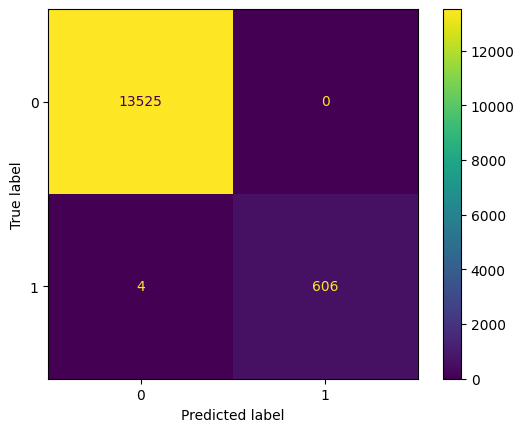

In [97]:
LogMod = LogisticRegression(penalty=None,class_weight={0:.3,1:.7})

LogMod.fit(X_train,y_train)

y_pred = (LogMod.predict_proba(X_test)[:,1]>0.25)#LogMod.predict(X_test)

test_frame['pred_helpful_log_mod'] = (LogMod.predict_proba(X_test)[:,1] > 0.12)

ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

# display(
#     test_frame[(test_frame['pred_helpful_log_mod']==1) & (test_frame['is_helpful']==0)]
# )

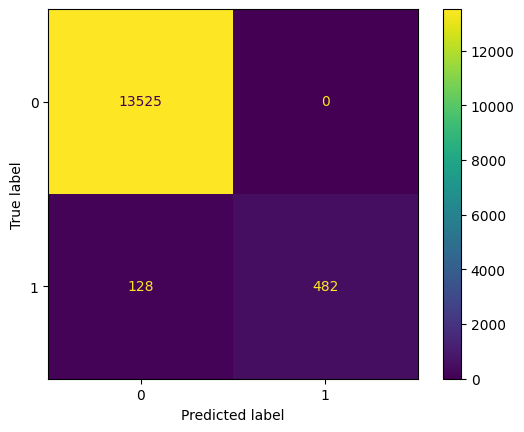

In [98]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
test_frame['pred_helpful_knn'] = y_pred #(knn.predict_proba(X_test)[:,1] > 0.45)
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

In [99]:
from sklearn.decomposition import PCA

pca = PCA()

pcs = pca.fit_transform(X_train)

pr_df = pd.DataFrame(data=pcs)

pr_df.columns = ["PC{}".format(i) for i in range(1,len(pca.components_)+1)]

exp_var = pca.explained_variance_ratio_

cum_var = np.cumsum(exp_var)

cum_var_df = pd.DataFrame({
    'Principal Component':[f'PC{i+1}' for i in range(len(cum_var))],
    'Cumulative Variance':cum_var,
    'Explained Variance':exp_var
})
cum_var_df

,Principal Component,Cumulative Variance,Explained Variance
0,PC1,0.385466,0.385466
1,PC2,0.583728,0.198262
2,PC3,0.759734,0.176006
3,PC4,0.913863,0.154129
4,PC5,1.000000,0.086137


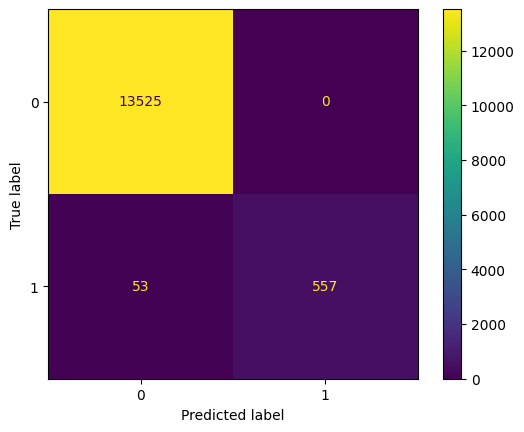

In [107]:
from sklearn import svm
pca2 = PCA(n_components=4)

w = pca2.fit(X_train)
r = pca2.transform(X_train)

spt_vector = svm.SVC(
    kernel='poly',degree=1,probability=True#,class_weight={0:.1,1:.9}
).fit(r,y_train)

X_test1_xform = pca2.transform(X_test)

y_pred = spt_vector.predict(X_test1_xform)
#spt_vector.predict_proba(X_test1_xform)[:,1] > 0.1 
# test_metrics.loc[len(test_metrics)] = {
#     'Model':'SVM-PCA (Normalized Data)',
#     'Accuracy':accuracy_score(y_test1,y_pred),
#     'F1':f1_score(y_test1,y_pred),
#     'Precision':precision_score(y_test1,y_pred),
#     'Recall':recall_score(y_test1,y_pred)
# }

ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()
# display(test_metrics)